In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

Load train and test data for our feature types
1. Bag-of-words
2. TF-IDF
3. Base Word2Vec
4. TF-IDF Weighted Word2Vec
5. **TODO**: Google Word2Vec
6. TF-IDF Weighted Google Word2Vec

Also loaded cleaned dataset from previous milestones in case it's needed

In [ ]:
DATA_FOLDER = "/content/drive/MyDrive/BTTAI - News AI Agent/Data"

In [ ]:
df_clean = pd.read_csv(os.path.join(DATA_FOLDER, "CLEANED_BBC_News_Train.csv"))
df_clean.head()

,ArticleId,Text,Category,cleaned_txt,word_count
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launch defence lawyer defend ...,191
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,203
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...,290
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...,354
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss 168m payout eighteen former enron d...,211


## this is just an experiment to train and evaluate naive bayes model on tf-idf vectorized data

this pipeline achieves 95% accuracy--so it's definitely an issue with our features rather than the models itself- Found out that it's label

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean['Text']
y = df_clean['Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)


MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test_vect)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9726027397260274

Classification Report:
                precision    recall  f1-score   support

     business       0.94      0.97      0.96        67
entertainment       1.00      0.98      0.99        54
     politics       0.95      0.96      0.95        54
        sport       0.99      1.00      0.99        66
         tech       1.00      0.94      0.97        51

     accuracy                           0.97       292
    macro avg       0.97      0.97      0.97       292
 weighted avg       0.97      0.97      0.97       292


Confusion Matrix:
 [[65  0  2  0  0]
 [ 0 53  1  0  0]
 [ 2  0 52  0  0]
 [ 0  0  0 66  0]
 [ 2  0  0  1 48]]


Use our testing data instead:

In [ ]:
X_test = pd.read_csv(f"{DATA_FOLDER}/CLEANED_BBC_News_Test.csv")
X_test_vect = vectorizer.transform(X_test['cleaned_txt'])
y_pred = nb_model.predict(X_test_vect)

y_test = pd.read_csv(f"{DATA_FOLDER}/BBC News Sample Solution.csv")
y_test = y_test['Category']

In [ ]:
y_pred[:5]

array(['sport', 'tech', 'sport', 'business', 'sport'], dtype='<U13')

In [ ]:
y_test[:5]

,Category
0,sport
1,tech
2,business
3,entertainment
4,politics


In [ ]:
X_test['Text'][4] # why is this not sport?

'boro suffer morrison injury blow middlesbrough midfielder james morrison has been ruled out for up to eight weeks after an operation on tuesday.  the 18-year-old  who has played in 13 of the club s last 14 games  had surgery to repair a double hernia. a club spokesman confirmed:  it is a bilateral sportsman s hernia  which was operated on yesterday.  morrison was sent for scans after being substituted at half-time during boro s 2-1 uefa cup win over graz ak in which he scored the equaliser. his injury is the latest blow for the teessiders  who have been without gaizka mendieta  george boateng and mark viduka for extended periods. meanwhile  the kick-off time for boro s uefa cup match at sporting lisbon on 17 march has been brought forward from 2115 gmt to 1945 gmt.'

In [ ]:
X_test['cleaned_txt'][4]

'boro suffer morrison injury blow middlesbrough midfielder james morrison ruled eight week operation tuesday 18-year-old play 13 club last 14 game surgery repair double hernia club spokesman confirm bilateral sportsman hernia operate yesterday morrison send scan substitute half-time boro 2-1 uefa cup win graz ak score equaliser injury late blow teessiders without gaizka mendieta george boateng mark viduka extend period meanwhile kick-off time boro uefa cup match sport lisbon 17 march bring forward 2115 gmt 1945 gmt'

In [ ]:
y_test[4]

'politics'

In [ ]:
single_pred = nb_model.predict(X_test_vect[4])
single_pred

array(['sport'], dtype='<U13')

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.19863945578231293

Classification Report:
                precision    recall  f1-score   support

     business       0.21      0.25      0.23       147
entertainment       0.23      0.17      0.19       147
     politics       0.17      0.17      0.17       147
        sport       0.21      0.24      0.22       147
         tech       0.18      0.16      0.17       147

     accuracy                           0.20       735
    macro avg       0.20      0.20      0.20       735
 weighted avg       0.20      0.20      0.20       735


Confusion Matrix:
 [[37 19 25 38 28]
 [34 25 34 30 24]
 [30 26 25 38 28]
 [39 18 26 35 29]
 [33 23 38 29 24]]


## Split Train Data into Train and Test

In [ ]:
# label for cleaned test data
y= df_clean['Category']

In [ ]:
# bag of words
from scipy import sparse
X_bow= sparse.load_npz(os.path.join(DATA_FOLDER, "X_train_bow.npz"))

X_train_bow, X_test_bow, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# tf-idf
X_tfidf = sparse.load_npz(os.path.join(DATA_FOLDER, "X_train_tfidf.npz"))
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# base word2vec
X_wv = pd.read_csv(os.path.join(DATA_FOLDER, 'X_train_wv.csv'))
X_train_wv, X_test_wv, y_train, y_test = train_test_split(
    X_wv, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# tf-idf weighted word2vec
w2v_tfidf_df_train = pd.read_csv(os.path.join(f"{DATA_FOLDER}/X_train_wv_tfidf.csv"))
X_w2v_tfidf = w2v_tfidf_df_train.drop(['Category'], axis=1)
X_train_w2v_tfidf, X_test_w2v_tfidf, y_train, y_test = train_test_split(
    X_w2v_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# google word2vec
X_google_wv = np.load(os.path.join(DATA_FOLDER, 'X_train_google_wv.npy'))
X_train_google_wv, X_test_google_wv, y_train, y_test = train_test_split(
    X_google_wv, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# google word2vec + TF-IDF
X_google_wv_tfidf = np.load(os.path.join(DATA_FOLDER, 'X_train_google_wv_tfidf.npy'))
X_train_google_wv_tfidf, X_test_google_wv_tfidf, y_train, y_test = train_test_split(
    X_google_wv_tfidf, y, test_size=0.2, random_state=42, stratify=y
)


# Model Development and Initial Evaluation

## Logistic Regression

Create pipeline to train and evaluate a logistic regression multinomial classifier. Experimented with regularization -- no effect on model performance.

### Define the LR Function

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # ignore warnings for prettier printing

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def run_logistic_regression(X_train, y_train, X_test, y_test, plot_cm=True, verbose=True, max_iter=500, C=1.0):
    """
    Train and evaluate a multinomial logistic regression classifier.
    Scale the input features using StandardScaler.
    Regularization parameter C is set to 1.0 by default.

    Parameters:
    - X_train, y_train: train features and labels
    - X_test, y_test: test features and labels
    - plot_cm: plot the confusion matrix (default True)
    - verbose: print metrics (default True)
    - max_iter: max iterations for solver (default 500)

    Returns:
    - model: trained LogisticRegression model
    - metrics: dict with train/test metrics
    """


    # Detect if data is sparse
    is_sparse = sparse.issparse(X_train)
    if is_sparse:
        scaler = StandardScaler(with_mean=False)
    else:
        scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize model
    model = LogisticRegression(
        C=C,
        multi_class='multinomial',
        solver='lbfgs', # can experiment with saga
        max_iter=max_iter,
        random_state=42
    )

    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Compute metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    test_precision = precision_score(y_test, y_pred_test, average='macro')
    test_recall = recall_score(y_test, y_pred_test, average='macro')
    test_f1 = f1_score(y_test, y_pred_test, average='macro')


    # Print Metrics
    if verbose:
        print(f"Train Accuracy: \t{train_acc:.4f}")
        print(f"Test Accuracy: \t{test_acc:.4f}")
        print(f"Test Precision: \t{test_precision:.4f}")
        print(f"Test Recall: \t{test_recall:.4f}")
        print(f"Test F1-score: \t{test_f1:.4f}")
        # print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

    # Show Confusion Matrix
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred_test)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    # Return Metrics
    metrics = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }

    return model, metrics

Train Accuracy: 	0.9906
Test Accuracy: 	0.9623
Test Precision: 	0.9639
Test Recall: 	0.9608
Test F1-score: 	0.9621


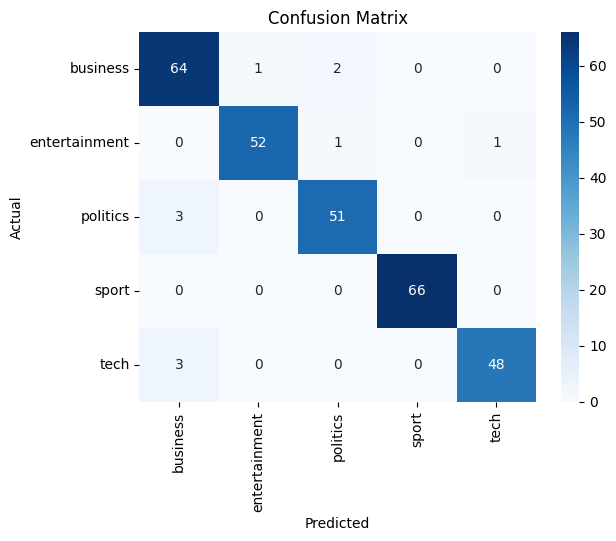

In [ ]:
# Run logistic regression (Baseline)
model_w2v, metrics_w2v = run_logistic_regression(X_train_w2v_tfidf, y_train, X_test_w2v_tfidf, y_test)

### Regularization


--- C = 0.005 ---


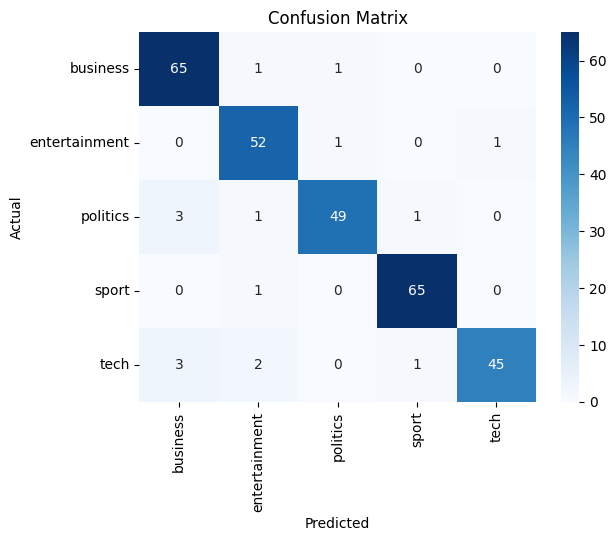

Train Accuracy: 0.9615
Test Accuracy: 0.9452
Test Precision: 0.9474
Test Recall:    0.9415
Test F1-score:  0.9435

--- C = 0.01 ---


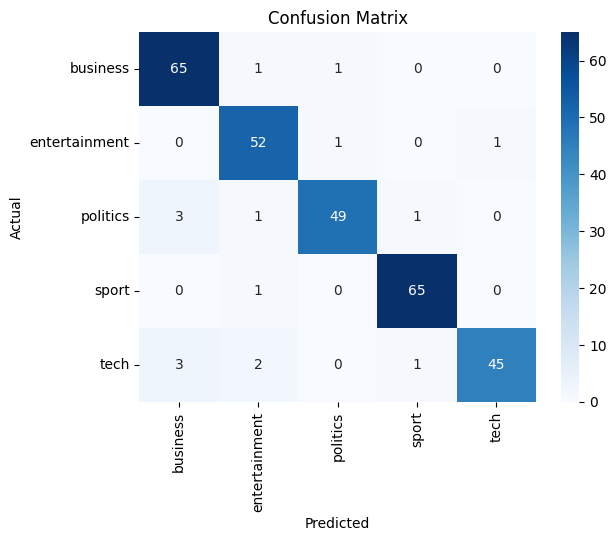

Train Accuracy: 0.9649
Test Accuracy: 0.9452
Test Precision: 0.9474
Test Recall:    0.9415
Test F1-score:  0.9435

--- C = 0.1 ---


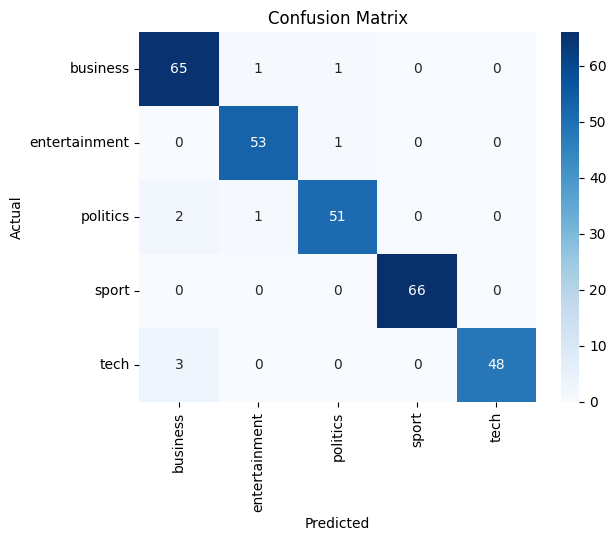

Train Accuracy: 0.9795
Test Accuracy: 0.9692
Test Precision: 0.9709
Test Recall:    0.9675
Test F1-score:  0.9689

--- C = 1.0 ---


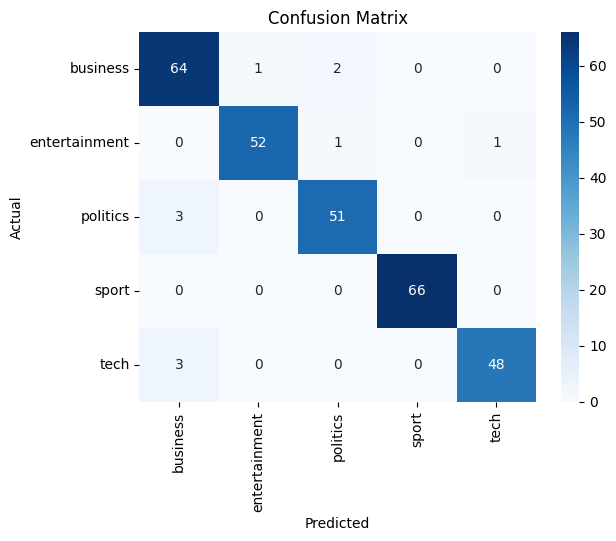

Train Accuracy: 0.9906
Test Accuracy: 0.9623
Test Precision: 0.9639
Test Recall:    0.9608
Test F1-score:  0.9621

--- C = 10 ---


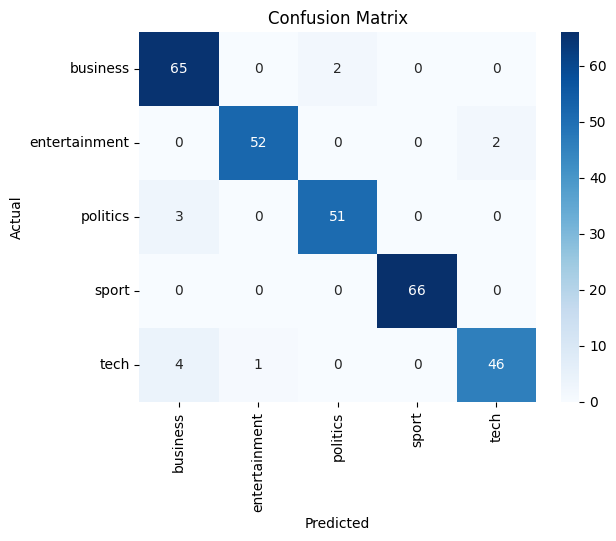

Train Accuracy: 0.9991
Test Accuracy: 0.9589
Test Precision: 0.9609
Test Recall:    0.9559
Test F1-score:  0.9580

--- C = 100 ---


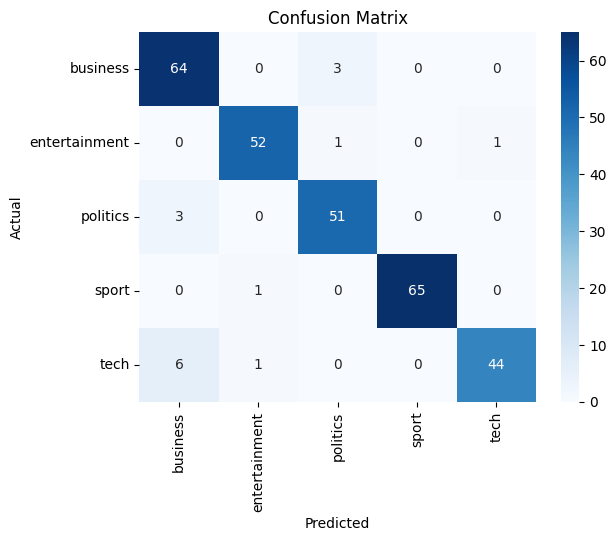

Train Accuracy: 1.0000
Test Accuracy: 0.9452
Test Precision: 0.9489
Test Recall:    0.9420
Test F1-score:  0.9444

Best C: 0.1
Best Test Accuracy: 0.9692
Best Test Precision: 0.9709
Best Test Recall: 0.9675


In [ ]:
C_values = [0.005, 0.01, 0.1, 1.0, 10, 100]
results = {}

for C in C_values:
    print(f"\n--- C = {C} ---")
    model, metrics = run_logistic_regression(
        X_train_w2v_tfidf, y_train,
        X_test_w2v_tfidf, y_test,
        plot_cm=True,
        verbose=False,
        max_iter=500,
        C=C
    )
    print(f"Train Accuracy: {metrics['train_accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"Test Precision: {metrics['test_precision']:.4f}")
    print(f"Test Recall:    {metrics['test_recall']:.4f}")
    print(f"Test F1-score:  {metrics['test_f1']:.4f}")

    results[C] = metrics

best_C = max(results, key=lambda c: results[c]['test_precision'])
best_metrics = results[best_C]
print(f"\nBest C: {best_C}")
print(f"Best Test Accuracy: {best_metrics['test_accuracy']:.4f}")
print(f"Best Test Precision: {best_metrics['test_precision']:.4f}")
print(f"Best Test Recall: {best_metrics['test_recall']:.4f}")

## Random Forest

In [ ]:


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
)

def random_forest(X_train, y_train, X_test, criterion='entropy', n_estimators=100,
                  max_depth=None, min_samples_split=2,
                  min_samples_leaf=1,max_features='sqrt'):
  """
  Builds the random forest classifier and predict categories from test data.

  Parameters:
  X_train (pd.DataFrame): DataFrame of the word encodins
  y_train
  param_dict (dict): dictionary for hyperparameter values.
  May include:criterion, n_estimators, min_samples_split, min_samples_leaf, max_features

  Returns:
  RandomForestClassifier: Trained RandomForest model
  pd.Series: predictions of the categories
  """
  # Create RandomForestClassifier model object
  rf_model = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators,
                                    min_samples_split=min_samples_split,max_features=max_features,
                                    min_samples_leaf=min_samples_leaf,)

  #print(w2v_tfidf_df_train.isna())

  # Fit the model to training data
  rf_model.fit(X_train, y_train)

  # # Make predictions by predicting probability of data being in category
  # rf_preds = rf_model.predict_proba(X_test_wv)
  # columns = rf_model.classes_
  # #print(rf_preds)

  ## Predictions
  y_pred_train = rf_model.predict(X_train)
  y_pred_test = rf_model.predict(X_test)


  #  basic evaluation metrics
  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc  = accuracy_score(y_test, y_pred_test)
  test_precision = precision_score(y_test, y_pred_test, average='macro')
  test_recall    = recall_score(y_test, y_pred_test, average='macro')
  test_f1        = f1_score(y_test, y_pred_test, average='macro')


  metrics = {
      'train_accuracy': train_acc,
      'test_accuracy': test_acc,
      'test_precision': test_precision,
      'test_recall': test_recall,
      'test_f1': test_f1
  }

  return rf_model, metrics

  # Retrieve column(category) with max probability
  #rf_preds_category=columns[rf_preds.argmax(axis =1)]
  #print(rf_preds_category)

  # return (rf_model, rf_preds)

### Hyperparameter tuning

Running the GridSearch took 12 mins. Here are the results:

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}

Best cross-validation score: 0.9597666996808627


In [ ]:
# param_grid = {
#     'n_estimators': [100, 200, 500],     # number of trees
#     'max_depth': [None, 10, 20],         # max depth of each tree
#     'min_samples_split': [10, 30],       # min samples to split a node
#     'min_samples_leaf': [3, 5, 7],       # min samples in a leaf
#     'max_features': ['sqrt', 'log2'],    # features considered per split
#     'bootstrap': [True]                  # use bagging
# }


# grid = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,                 # 5-fold cross-validation
#     scoring='precision',
#     n_jobs=-1
# )

# # Fit model
# grid.fit(X_train_wv, y_train)
# best_rf = grid.best_estimator_

# print("Best parameters:", grid.best_params_)
# print("Best cross-validation score:", grid.best_score_)

# # predictions
# y_pred_test_rf = best_rf.predict(X_test_wv)

### Model Evaluation

In [ ]:
# Check shapes
print(X_train_wv.shape, X_test_wv.shape, y_train.shape, y_test.shape)

# Check that columns match exactly
print((X_train_wv.columns == X_test_wv.columns).all())

# Check unique labels in train/test
print(set(y_train), set(y_test))

#define testing data (change when trying different feature encoding types)
X_test = X_test_wv
y_test = y_test

# Calculate accuracy of our test using test data
y_pred_train_rf = best_rf.predict(X_train_wv)
train_accuracy = accuracy_score(y_train, y_pred_train_rf)
test_accuracy = accuracy_score(y_test, y_pred_test_rf)
test_precision = precision_score(y_test, y_pred_test_rf, average='macro')
test_recall = recall_score(y_test, y_pred_test_rf, average='macro')
test_f1 = f1_score(y_test, y_pred_test_rf, average='macro')
print(f"Train Accuracy Score: {train_accuracy:.4f}")
print(f"Test Accuracy Score: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

# Display Confusion Matrix of Cross-Validation
cm = confusion_matrix(y_test, y_pred_test_rf, labels=best_rf.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
# Compute ROC Curve
# Binarize labels for 5-class problem
y_test_bin = label_binarize(y_test, classes=best_rf.classes_)

# Predicted probabilities
y_score = best_rf.predict_proba(X_test_wv)  # returns list of arrays per class

# Plot ROC for each class
fig, ax = plt.subplots()
for i, class_name in enumerate(best_rf.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc_score = auc(fpr, tpr)
    sns.lineplot(x=fpr, y=tpr, ax=ax, label=f"{class_name} (AUC={auc_score:.3f})")

plt.title("Multiclass ROC Curve (one-vs-rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Naive Bayes

In [ ]:
#import libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
)
from sklearn.preprocessing import label_binarize
from itertools import cycle

def naive_bayes(X_train, y_train, X_test, y_test, plot_cm=True):
    """
    Builds a Multinomial Naive Bayes classifier and predicts categories from test data.

    Parameters:
    X_train (pd.DataFrame): Training feature matrix (e.g., TF-IDF, Bag of words, [word2vec might not work as well with naive bayes but we will experiment.] )
    y_train (pd.Series or np.array): Training labels
    X_test (pd.DataFrame): Test feature matrix

    Returns:
    MultinomialNB: Trained Naive Bayes model
    pd.Series or np.array: Predictions of the categories
    """

# Train the MultinomialNB model

    # Create Naive Bayes model
    nb_model = MultinomialNB(alpha=0.5, fit_prior=True)

    # Fit the model to training data
    nb_model.fit(X_train, y_train)

    ## Predictions
    y_pred_train = nb_model.predict(X_train)
    y_pred_test = nb_model.predict(X_test)
    y_score = nb_model.predict_proba(X_test)


# Grid Search

    #manually setting best hyperparameters from grid search
    param_grid = {
          'alpha': [0.1, 0.5, 1.0, 2.0],
          'fit_prior': [True, False]
      }

    grid = GridSearchCV(
        estimator=MultinomialNB(),
        param_grid=param_grid,
        scoring='f1_weighted',
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    print("Best Parameters:", grid.best_params_)
    print("Best Cross-Validation Score:", grid.best_score_)


# Evaluation

#  basic evaluation metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='macro')
    test_recall    = recall_score(y_test, y_pred_test, average='macro')
    test_f1        = f1_score(y_test, y_pred_test, average='macro')



    # confusion matrix
    if plot_cm:
      cm = confusion_matrix(y_test, y_pred_test)
      plt.figure(figsize=(6, 5))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title("Confusion Matrix")
      plt.xlabel("Predicted Labels")
      plt.ylabel("True Labels")
      plt.show()

    #ROC curve
    y_score = nb_model.predict_proba(X_test)
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)

    fpr, tpr, roc_auc = dict(), dict(), dict()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

    for i, color in zip(range(len(classes)), colors):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves (One-vs-Rest)')
    plt.legend(loc='lower right')
    plt.show()


    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print(f"Precision:      {test_precision:.4f}")
    print(f"Recall:         {test_recall:.4f}")
    print(f"F1-score:       {test_f1:.4f}")


    # Metrics Dictionary
    metrics = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }

    return nb_model, metrics




Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Best Cross-Validation Score: 0.9744757525586116


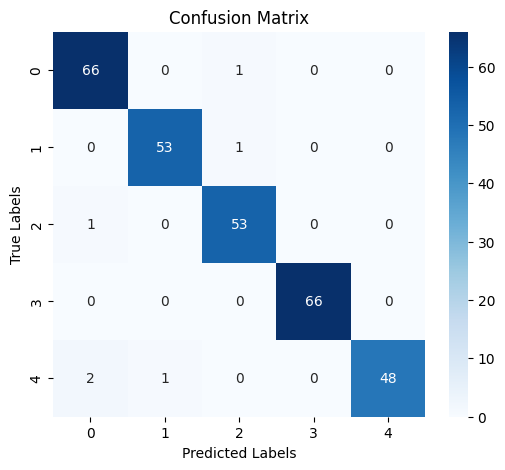

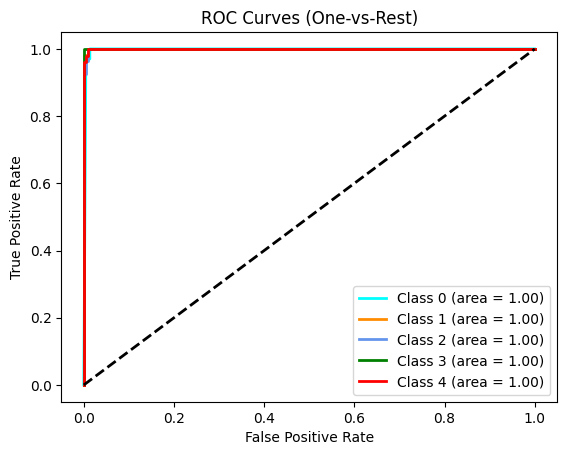

Train Accuracy: 0.9949
Test Accuracy:  0.9795
Precision:      0.9803
Recall:         0.9778
F1-score:       0.9788


In [ ]:
#encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

best_nb_model, metrics_nb = naive_bayes(X_train_bow, y_train, X_test_bow, y_test)


# SelectKbest with Naive Bayes

Original shape: (1168, 221705)
Reduced shape: (1168, 3000)
Train Accuracy: 0.9837
Test Accuracy:  0.9692
Precision:      0.9726
Recall:         0.9665
F1-score:       0.9690


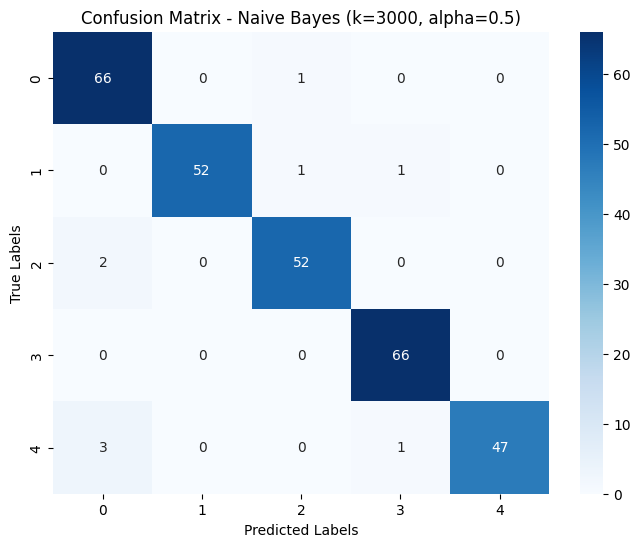

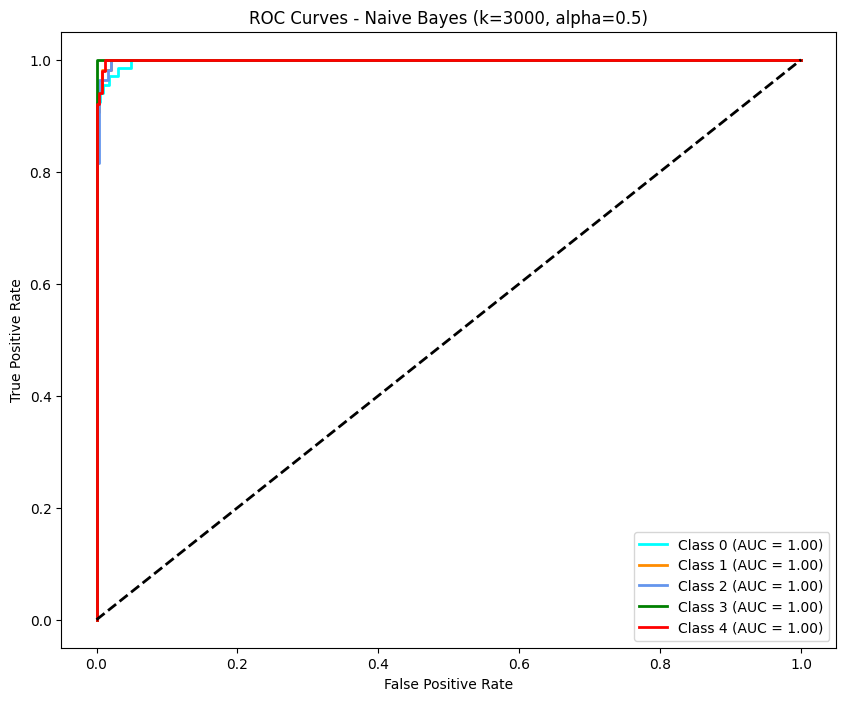

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Apply feature selection
selector = SelectKBest(chi2, k=3000)   # keep top 3000 features
X_train_sel = selector.fit_transform(X_train_tfidf, y_train)
X_test_sel  = selector.transform(X_test_tfidf)

print("Original shape:", X_train_tfidf.shape)
print("Reduced shape:", X_train_sel.shape)

# Train Naive Bayes on selected features
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_sel, y_train)

#Predictions
y_pred_train = nb.predict(X_train_sel)
y_pred_test = nb.predict(X_test_sel)
y_score = nb.predict_proba(X_test_sel)


# basic evaluation metrics
train_acc = accuracy_score(y_train, y_pred_train)
test_acc  = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall    = recall_score(y_test, y_pred_test, average='macro')
test_f1        = f1_score(y_test, y_pred_test, average='macro')

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Precision:      {test_precision:.4f}")
print(f"Recall:         {test_recall:.4f}")
print(f"F1-score:       {test_f1:.4f}")


#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes (k=3000, alpha=0.5)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ROC Curves
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = dict(), dict(), dict()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(len(classes)), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
            label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Naive Bayes (k=3000, alpha=0.5)')
plt.legend(loc='lower right')
plt.show()

# Metrics Dictionary
metrics = {
    'train_accuracy': train_acc,
    'test_accuracy': test_acc,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1': test_f1
}


In [ ]:
for k in [1000, 3000, 5000, 8000]:

    print(f"For k: {k}\n")
    selector = SelectKBest(chi2, k=k)
    X_train_sel = selector.fit_transform(X_train_tfidf, y_train)
    X_test_sel  = selector.transform(X_test_tfidf)

    nb = MultinomialNB(alpha=0.5)
    nb.fit(X_train_sel, y_train)

    #Predictions
    y_pred_train = nb.predict(X_train_sel)
    y_pred_test = nb.predict(X_test_sel)
    y_score = nb.predict_proba(X_test_sel)


   #  basic evaluation metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='macro')
    test_recall    = recall_score(y_test, y_pred_test, average='macro')
    test_f1        = f1_score(y_test, y_pred_test, average='macro')

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print(f"Precision:      {test_precision:.4f}")
    print(f"Recall:         {test_recall:.4f}")
    print(f"F1-score:       {test_f1:.4f}\n")


    # Metrics Dictionary
    metrics = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }

For k: 1000

Train Accuracy: 0.9700
Test Accuracy:  0.9623
Precision:      0.9665
Recall:         0.9591
F1-score:       0.9621

For k: 3000

Train Accuracy: 0.9837
Test Accuracy:  0.9692
Precision:      0.9726
Recall:         0.9665
F1-score:       0.9690

For k: 5000

Train Accuracy: 0.9889
Test Accuracy:  0.9726
Precision:      0.9753
Recall:         0.9704
F1-score:       0.9724

For k: 8000

Train Accuracy: 0.9897
Test Accuracy:  0.9692
Precision:      0.9725
Recall:         0.9667
F1-score:       0.9691



The evaluation metrics show that Naive Bayes' performance increases as the  number of features used in training the model increases.

Original Shape:  (1168, 221705)
Reduced Shape:  (1168, 5000)
Train Accuracy: 0.9923
Test Accuracy:  0.9795
Precision:      0.9803
Recall:         0.9778
F1-score:       0.9788



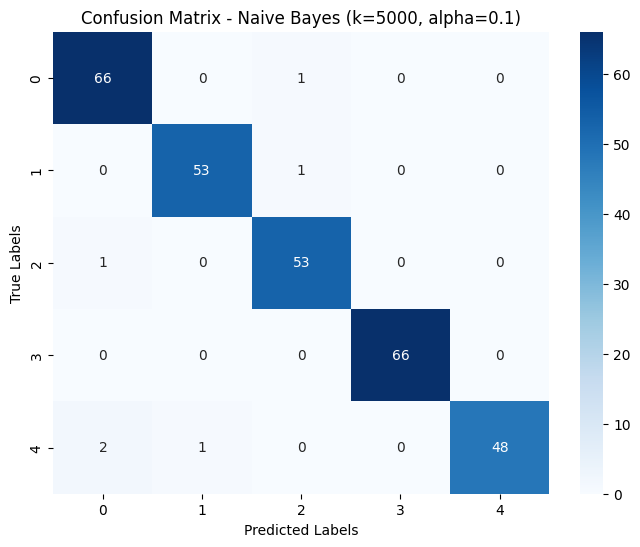

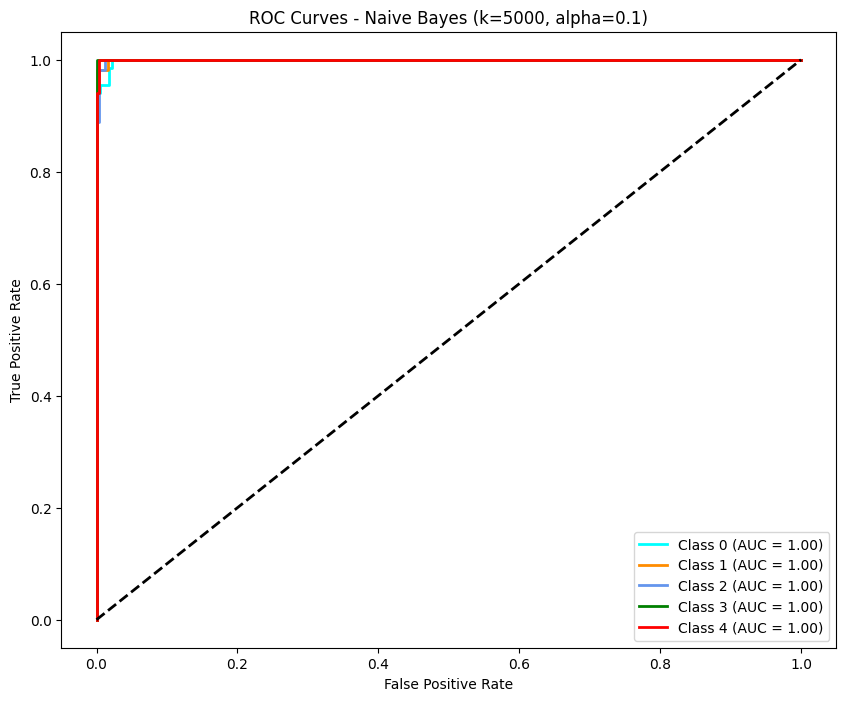

In [ ]:
#Selecting the best k = 5000
selector = SelectKBest(chi2, k=5000)
X_train_sel = selector.fit_transform(X_train_tfidf, y_train)
X_test_sel = selector.transform(X_test_tfidf)

print("Original Shape: ", X_train_tfidf.shape)
print("Reduced Shape: ", X_train_sel.shape)

#Train Naive Bayes with best parameters (alpha=0.1, fit_prior=True)
nb_model = MultinomialNB(alpha=0.1, fit_prior=True)
nb_model.fit(X_train_sel, y_train)

y_pred_train = nb_model.predict(X_train_sel)
y_pred_test = nb_model.predict(X_test_sel)
y_score = nb_model.predict_proba(X_test_sel)

#Evaluation metrics
train_acc = accuracy_score(y_train, y_pred_train)
test_acc  = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall    = recall_score(y_test, y_pred_test, average='macro')
test_f1        = f1_score(y_test, y_pred_test, average='macro')

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Precision:      {test_precision:.4f}")
print(f"Recall:         {test_recall:.4f}")
print(f"F1-score:       {test_f1:.4f}\n")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes (k=5000, alpha=0.1)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ROC Curves
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = dict(), dict(), dict()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(len(classes)), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
            label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Naive Bayes (k=5000, alpha=0.1)')
plt.legend(loc='lower right')
plt.show()

# Metrics Dictionary
metrics_best_nb = {
    'train_accuracy': train_acc,
    'test_accuracy': test_acc,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1': test_f1
}

The best model with the optimal number of features (k) and best parameters.

# Feature and Model Comparison


Subtask 1: Evaluate all feature types (Bag of Words, TF-IDF, Word2Vec, TF-IDF Weighted Word2Vec, Google Word2Vec, TF-IDF Weighted Google Word2Vec) using Logistic Regression to identify the best-performing feature representation.

- **Best Performance: TF-IDF Weighted Word2Vec**

Subtask 2: Train all models (Logistic Regression, Naive Bayes, Random Forest) on the best feature type to determine the best overall model.



In [ ]:
# list of feature types and train/test features
feature_types = [
    ("Bag of Words", X_train_bow, X_test_bow),
    ("TF-IDF", X_train_tfidf, X_test_tfidf),
    ("Base Word2Vec", X_train_wv, X_test_wv),
    ("TF-IDF Weighted Word2Vec", X_train_w2v_tfidf, X_test_w2v_tfidf),
    ("Google Word2Vec", X_train_google_wv, X_test_google_wv),
    ("TF-IDF Weighted Google Word2Vec", X_train_google_wv_tfidf, X_test_google_wv_tfidf),
]

## Subtask 1: Try Logistic Regression on All Feature Types

In [ ]:
results_lr = {}

print(f"Testing Logistic Regression\n")
for feature_type, X_train, X_test in feature_types:
    print(f"\n--- {feature_type} ---")
    model, metrics = run_logistic_regression(
        X_train, y_train,
        X_test, y_test,
        plot_cm=False,
        verbose=False,
        max_iter=500,
        C=best_C
    )

    print(f"Train Accuracy: {metrics['train_accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"Test Precision: {metrics['test_precision']:.4f}")
    print(f"Test Recall:    {metrics['test_recall']:.4f}")
    print(f"Test F1-score:  {metrics['test_f1']:.4f}")

    results_lr[feature_type] = metrics

best_feature_type_lr = max(results_lr, key=lambda ft: results_lr[ft]['test_precision'])
best_metrics_lr = results_lr[best_feature_type_lr]
print(f"\nBest Feature Type: {best_feature_type_lr}")

Testing Logistic Regression


--- Bag of Words ---
Train Accuracy: 1.0000
Test Accuracy: 0.9623
Test Precision: 0.9661
Test Recall:    0.9593
Test F1-score:  0.9618

--- TF-IDF ---
Train Accuracy: 1.0000
Test Accuracy: 0.9726
Test Precision: 0.9753
Test Recall:    0.9714
Test F1-score:  0.9731

--- Base Word2Vec ---
Train Accuracy: 0.9777
Test Accuracy: 0.9658
Test Precision: 0.9690
Test Recall:    0.9630
Test F1-score:  0.9653

--- TF-IDF Weighted Word2Vec ---
Train Accuracy: 0.9795
Test Accuracy: 0.9692
Test Precision: 0.9709
Test Recall:    0.9675
Test F1-score:  0.9689

--- Google Word2Vec ---
Train Accuracy: 1.0000
Test Accuracy: 0.9726
Test Precision: 0.9750
Test Recall:    0.9704
Test F1-score:  0.9724

--- TF-IDF Weighted Google Word2Vec ---
Train Accuracy: 1.0000
Test Accuracy: 0.9658
Test Precision: 0.9688
Test Recall:    0.9645
Test F1-score:  0.9663

Best Feature Type: TF-IDF


## Subtask 2: Try Naive Bayes on Bag of Words and TF-IDF( it doesnt take word embedding vectors)

Testing Multinomial Naive Bayes
 - skipping word2vec for Naive Bayes since it does not take negatives

--- Bag of Words ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Best Cross-Validation Score: 0.9744757525586116


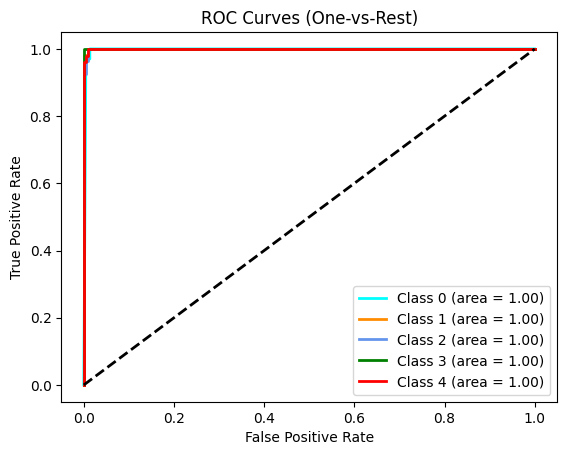

Train Accuracy: 0.9949
Test Accuracy:  0.9795
Precision:      0.9803
Recall:         0.9778
F1-score:       0.9788

--- TF-IDF ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Best Cross-Validation Score: 0.9744202565340249


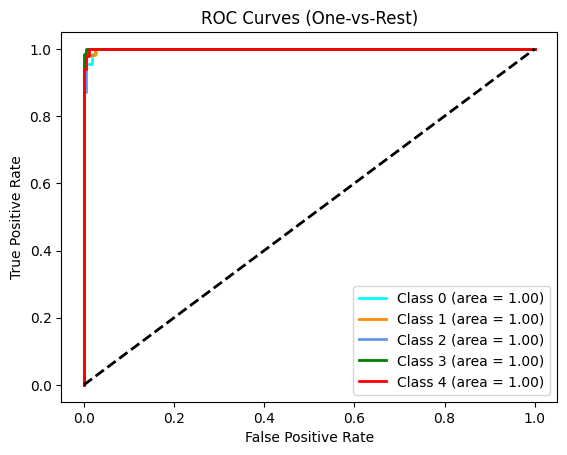

Train Accuracy: 0.9991
Test Accuracy:  0.9692
Precision:      0.9726
Recall:         0.9665
F1-score:       0.9689

Best Feature Type: Bag of Words


In [ ]:
results_nb = {}

print(f"Testing Multinomial Naive Bayes\n - skipping word2vec for Naive Bayes since it does not take negatives")
for feature_type, X_train, X_test in feature_types[:2]:
    print(f"\n--- {feature_type} ---")

    # Train and evaluate Naive Bayes
    model, metrics = naive_bayes(
        X_train, y_train,
        X_test, y_test,
        plot_cm=False
    )

    # Store results for comparison
    results_nb[feature_type] = metrics

# Select best feature type by test F1-score (you can change to precision if preferred)
best_feature_type_nb = max(results_nb, key=lambda ft: results_nb[ft]['test_accuracy'])
best_metrics_nb = results_nb[best_feature_type_nb]
print(f"\nBest Feature Type: {best_feature_type_nb}")

## Subtask 3: Try Random Forest on all features

In [ ]:
results_rf = {}

for feature_type, X_train, X_test in feature_types:
    print(f"\n--- {feature_type} ---")

    # Train and evaluate Naive Bayes
    model, metrics = random_forest(X_train, y_train, X_test, min_samples_leaf=3, min_samples_split=10, n_estimators=200)
    # Use best metrics: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}

    # Print metrics
    print(f"Train Accuracy: {metrics['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {metrics['test_accuracy']:.4f}")
    print(f"Test Precision: {metrics['test_precision']:.4f}")
    print(f"Test Recall:    {metrics['test_recall']:.4f}")
    print(f"Test F1-score:  {metrics['test_f1']:.4f}")

    # Store results for comparison
    results_rf[feature_type] = metrics

# Select best feature type by test F1-score (you can change to precision if preferred)
best_feature_type_rf = max(results_rf, key=lambda ft: results_rf[ft]['test_accuracy'])
best_metrics_rf = results_rf[best_feature_type_rf]
print(f"\nBest Feature Type: {best_feature_type_rf}")


--- Bag of Words ---
Train Accuracy: 0.9914
Test Accuracy:  0.9521
Test Precision: 0.9534
Test Recall:    0.9471
Test F1-score:  0.9493

--- TF-IDF ---
Train Accuracy: 0.9880
Test Accuracy:  0.9692
Test Precision: 0.9696
Test Recall:    0.9663
Test F1-score:  0.9677

--- Base Word2Vec ---
Train Accuracy: 0.9923
Test Accuracy:  0.9692
Test Precision: 0.9701
Test Recall:    0.9669
Test F1-score:  0.9683

--- TF-IDF Weighted Word2Vec ---
Train Accuracy: 0.9940
Test Accuracy:  0.9486
Test Precision: 0.9489
Test Recall:    0.9457
Test F1-score:  0.9471

--- Google Word2Vec ---
Train Accuracy: 1.0000
Test Accuracy:  0.9555
Test Precision: 0.9569
Test Recall:    0.9539
Test F1-score:  0.9552

--- TF-IDF Weighted Google Word2Vec ---
Train Accuracy: 1.0000
Test Accuracy:  0.9384
Test Precision: 0.9390
Test Recall:    0.9358
Test F1-score:  0.9370

Best Feature Type: TF-IDF


# Best Model selection

In this project, the Multinomial Naive Bayes (NB) classifier was tested specifically on Bag-of-Words (BoW) and TF-IDF feature representations, as the algorithm is designed for count-based data and does not handle negative or dense continuous embeddings such as Word2Vec effectively, whereas, Logistic Regression and Random Forest models were tested on all six feature types — [BoW, TF-IDF, Base Word2Vec, TF-IDF Weighted Word2Vec, Google Word2Vec, and TF-IDF Weighted Google Word2Vec ] to identify the most robust feature-model combination.

Among all experiments, Naive Bayes with Bag-of-Words achieved the highest overall performance across all key metrics, with a training accuracy of 0.9949, test accuracy of 0.9795, precision of 0.9803, recall of 0.9778, and F1-score of 0.9788. These results surpass all other combinations, including Logistic Regression and Random Forest with TF-IDF or embedding-based features. The findings demonstrate that the probabilistic assumptions of Naive Bayes, when combined with simple frequency-based BoW features, provided the most effective balance between accuracy and generalization for this BBC news classification task. Therefore, Naive Bayes with Bag-of-Words is identified as the best-performing model for our classification.

## Model Comparison Visualizations

In [ ]:
df_lr = pd.DataFrame(results_lr).T.assign(Model='Logistic Regression')
df_nb = pd.DataFrame(results_nb).T.assign(Model='Naive Bayes')
df_rf = pd.DataFrame(results_rf).T.assign(Model='Random Forest')

# Merge dfs (missing feature types will not appear)
df_all = pd.concat([df_lr, df_nb, df_rf], axis=0)
df_all.reset_index(inplace=True)
df_all.rename(columns={'index': 'Feature Type'}, inplace=True)

rename_map = {
    'train_accuracy': 'Train Accuracy',
    'test_accuracy': 'Accuracy',
    'test_precision': 'Precision',
    'test_recall': 'Recall',
    'test_f1': 'F1-score'
}
df_all.rename(columns=rename_map, inplace=True)

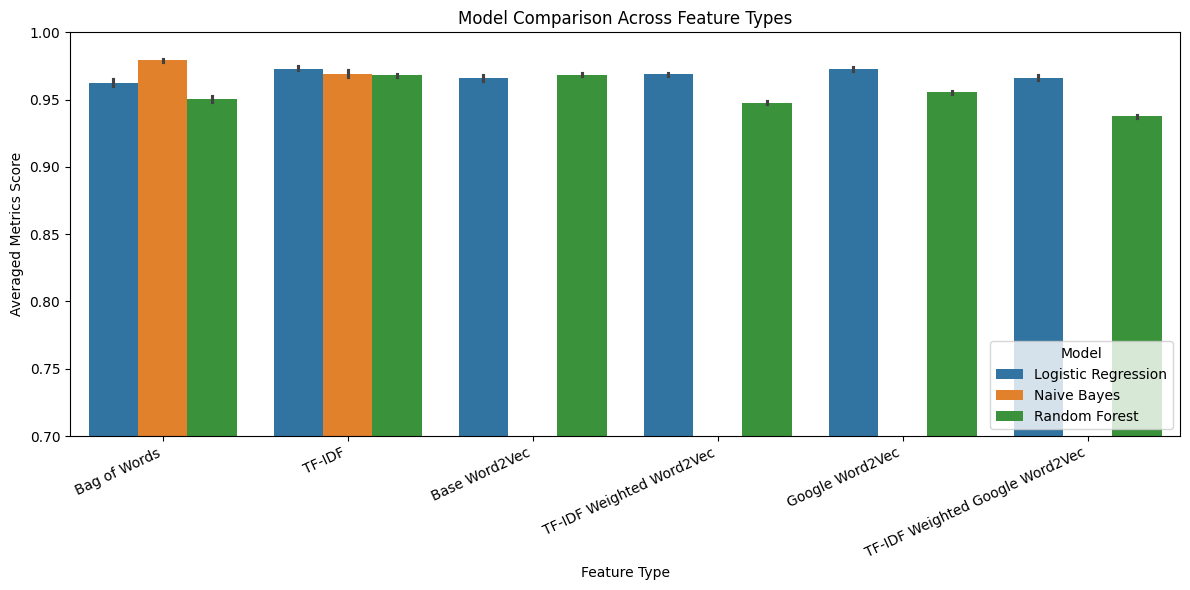

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
df_melted = df_all.melt(id_vars=['Feature Type', 'Model'],
                        value_vars=metrics,
                        var_name='Metric', value_name='Averaged Metrics Score')

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, x='Feature Type', y='Averaged Metrics Score', hue='Model')
plt.title('Model Comparison Across Feature Types')
plt.xticks(rotation=25, ha='right')
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

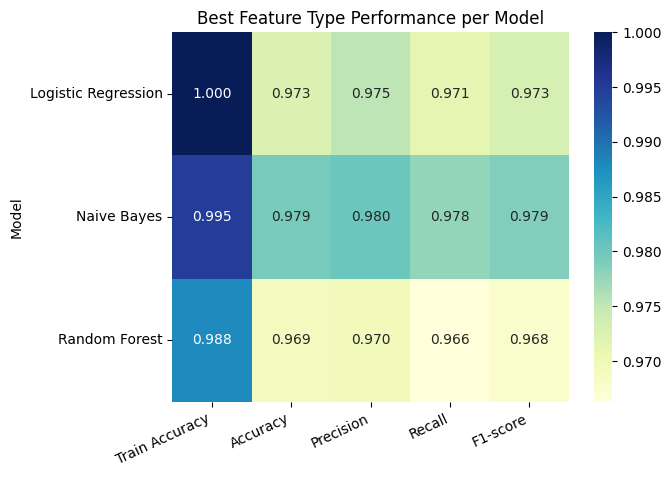

In [ ]:
best_scores = {
    'Logistic Regression': results_lr[best_feature_type_lr],
    'Naive Bayes': results_nb[best_feature_type_nb],
    'Random Forest': results_rf[best_feature_type_rf]
}

df_best = pd.DataFrame(best_scores).T
df_best = df_best[[k for k in rename_map.keys()]]
df_best.rename(columns=rename_map, inplace=True)
df_best.reset_index(inplace=True)
df_best.rename(columns={'index': 'Model'}, inplace=True)

sns.heatmap(df_best.set_index('Model'), annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Best Feature Type Performance per Model')
plt.xticks(rotation=25, ha='right')
plt.yticks(rotation=0)
plt.show()


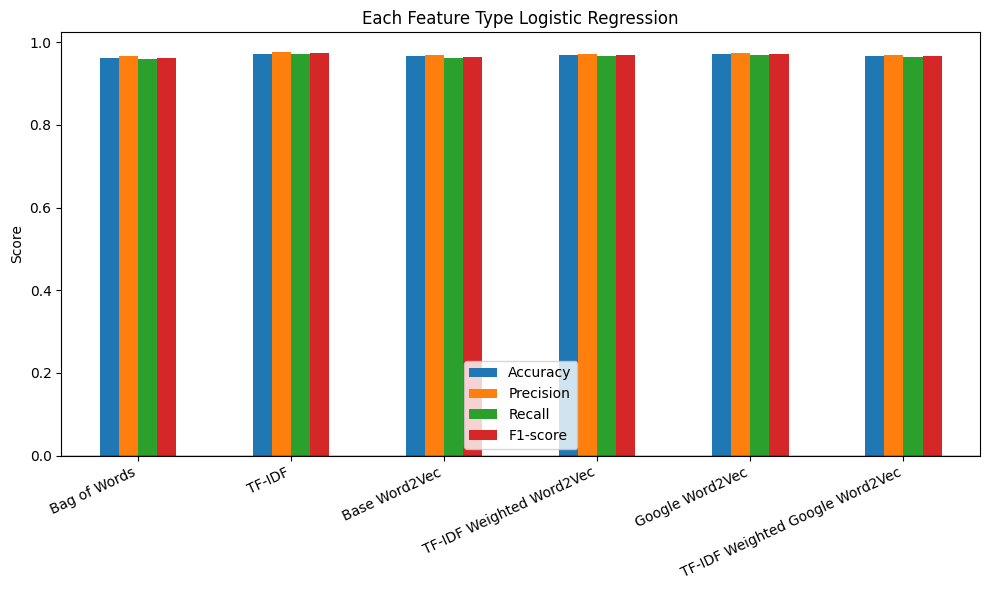

In [ ]:
df_lr = pd.DataFrame(results_lr).T
df_lr.rename(columns=rename_map, inplace=True)

plt.figure(figsize=(10,6))
df_lr[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind='bar', figsize=(10,6), ax=plt.gca()
)
plt.title(f'Each Feature Type Logistic Regression')
plt.ylabel('Score')
plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

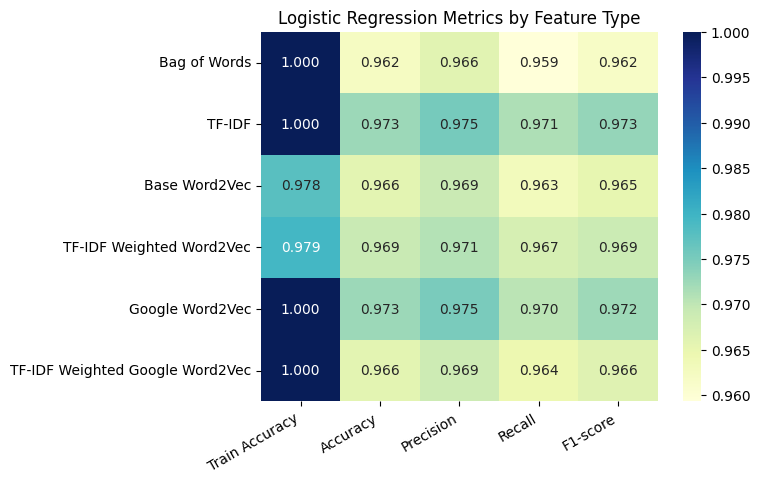

In [ ]:
sns.heatmap(df_lr, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Logistic Regression Metrics by Feature Type')
plt.xticks(rotation=30, ha='right')
plt.show()

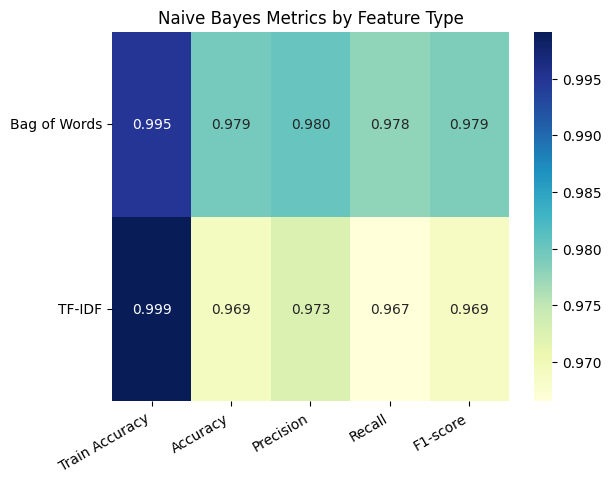

In [ ]:
df_nb = pd.DataFrame(results_nb).T
df_nb.rename(columns=rename_map, inplace=True)

sns.heatmap(df_nb, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Naive Bayes Metrics by Feature Type')
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.show()

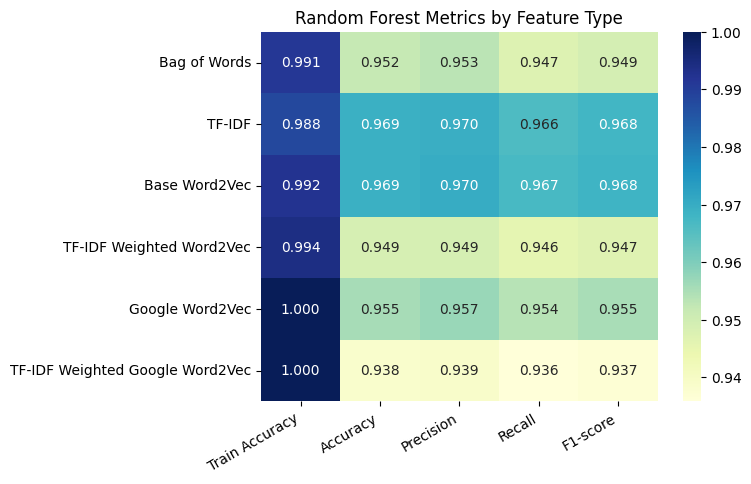

In [ ]:
df_rf = pd.DataFrame(results_rf).T
df_rf.rename(columns=rename_map, inplace=True)

sns.heatmap(df_rf, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Random Forest Metrics by Feature Type')
plt.xticks(rotation=30, ha='right')
plt.show()

# Saving the model to make Model Persistent

In [ ]:
import pickle

# Save the model
with open("best_news_nb.pkl", "wb") as f:
    pickle.dump(best_nb_model, f)


# Load the model back
with open("best_news_nb.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")

# Predict on test set
predictions = loaded_model.predict(X_test_bow)

# Decode using existing encoder
category_predictions = le.inverse_transform(predictions)

# Display predictions (already category names)
print(f"Predictions: {category_predictions[:20]}")

Model loaded successfully!
Predictions: ['business' 'tech' 'entertainment' 'sport' 'business' 'sport' 'sport'
 'politics' 'politics' 'sport' 'business' 'sport' 'business' 'business'
 'tech' 'tech' 'politics' 'business' 'entertainment' 'business']


In [ ]:
import pickle

# Save the label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("label_encoder.pkl saved successfully!")


label_encoder.pkl saved successfully!
